 # Diamond Price Predition - Linear Regression Problem

### Project Objective 

The objective of this project is to create a predictive model that estimates price of diamond by analyzing the charecteristics of diamond.

### Data Source

In this Jupyter notebook, we'll be working with the Diamond Prices dataset, which contains information about various attributes of diamonds, such as carat, cut, color, clarity, depth, table, and price. Our objective is to build a linear regression model that can predict the price of a diamond based on its attributes. The dataset is available at the following link:

https://www.kaggle.com/datasets/vittoriogiatti/diamondprices/

## Import Libraries and Load Dataset

In [4]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
# Read the dataset
df = pd.read_csv("DiamondsPrices.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Summarizing what each column in the diamond dataset represents:
* carat: The weight of the diamond, measured in carats. Carat is a unit of weight used for gemstones, where one carat is equivalent to 200 milligrams.
* cut: Describes the quality of the diamond's cut. This is categorized into levels such as 'Ideal', 'Premium', 'Good', 'Very Good', and 'Fair'. The cut quality affects how well the diamond reflects light.
* color: Represents the color grade of the diamond. The color grade ranges from 'D' (colorless) to 'Z' (light yellow). D is considered the most colorless and valuable.
* clarity: Indicates how clear or flawless the diamond is. It is categorized into levels like 'IF' (Internally Flawless), 'VVS1' (Very Very Slightly Included 1), 'VVS2', 'VS1' (Very Slightly Included 1), 'VS2', 'SI1' (Slightly Included 1), 'SI2', and 'I1' (Included 1).
* depth: Refers to the depth percentage, which is the depth of the diamond relative to its width. It's an important factor in determining a diamond's brilliance and overall appearance.
* table: Represents the width of the top of the diamond relative to the widest point. It is expressed as a percentage.
* price: Indicates the price of the diamond. This is the target variable that we are trying to predict.
* x: Represents the length of the diamond in millimeters.
* y: Represents the width of the diamond in millimeters.
* z: Indicates the depth of the diamond in millimeters.

## Data Exploration

In [44]:
df.shape

(53940, 10)

* The dataset contains 53940 rows and 10 columns, representing the dimensions of the data.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [46]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Data Cleaning and Feature Engineering

#### Handling Missing Values and Duplicates

In [6]:
# Checking Null values
missing_values = df.isnull().sum()
print(missing_values)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


No null values in the dataset

In [7]:
#if there are missing values then fill by mean
df = df.fillna(df.mean(numeric_only = True))

In [8]:
# Check duplicate values
duplicate_values = df[df.duplicated()]
print(duplicate_values)

       carat    cut color clarity  depth  table  price     x     y     z
1005    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1006    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1007    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1008    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
2025    1.52   Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28
...      ...    ...   ...     ...    ...    ...    ...   ...   ...   ...
47969   0.52  Ideal     D     VS2   61.8   55.0   1919  5.19  5.16  3.20
49326   0.51  Ideal     F    VVS2   61.2   56.0   2093  5.17  5.19  3.17
49557   0.71   Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.00
50079   0.51  Ideal     F    VVS2   61.2   56.0   2203  5.19  5.17  3.17
52861   0.50   Fair     E     VS2   79.0   73.0   2579  5.21  5.18  4.09

[146 rows x 10 columns]


There are total 146 duplicate rows were present

In [10]:
# Drop the duplicates
data = df.drop_duplicates()

#### Remove Outliers From The Data

In [11]:
data.shape

(53794, 10)

Before removing the outliers the data contains 53794 rows

In [15]:
# Removing the outliers from the data by using Interquartile Range (IQR) method
data, Q1 = data.align(Q1, axis=1, copy=False)
data, Q3 = data.align(Q3, axis=1, copy=False)

IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [16]:
data.shape

(45758, 10)

After removing outliers from the data set, rows are decreased by 8036

#### Variable Selection

In [24]:
X = data['carat']  # Feature Variable
y = data['price']  # Target Variable

#### Data Visualization

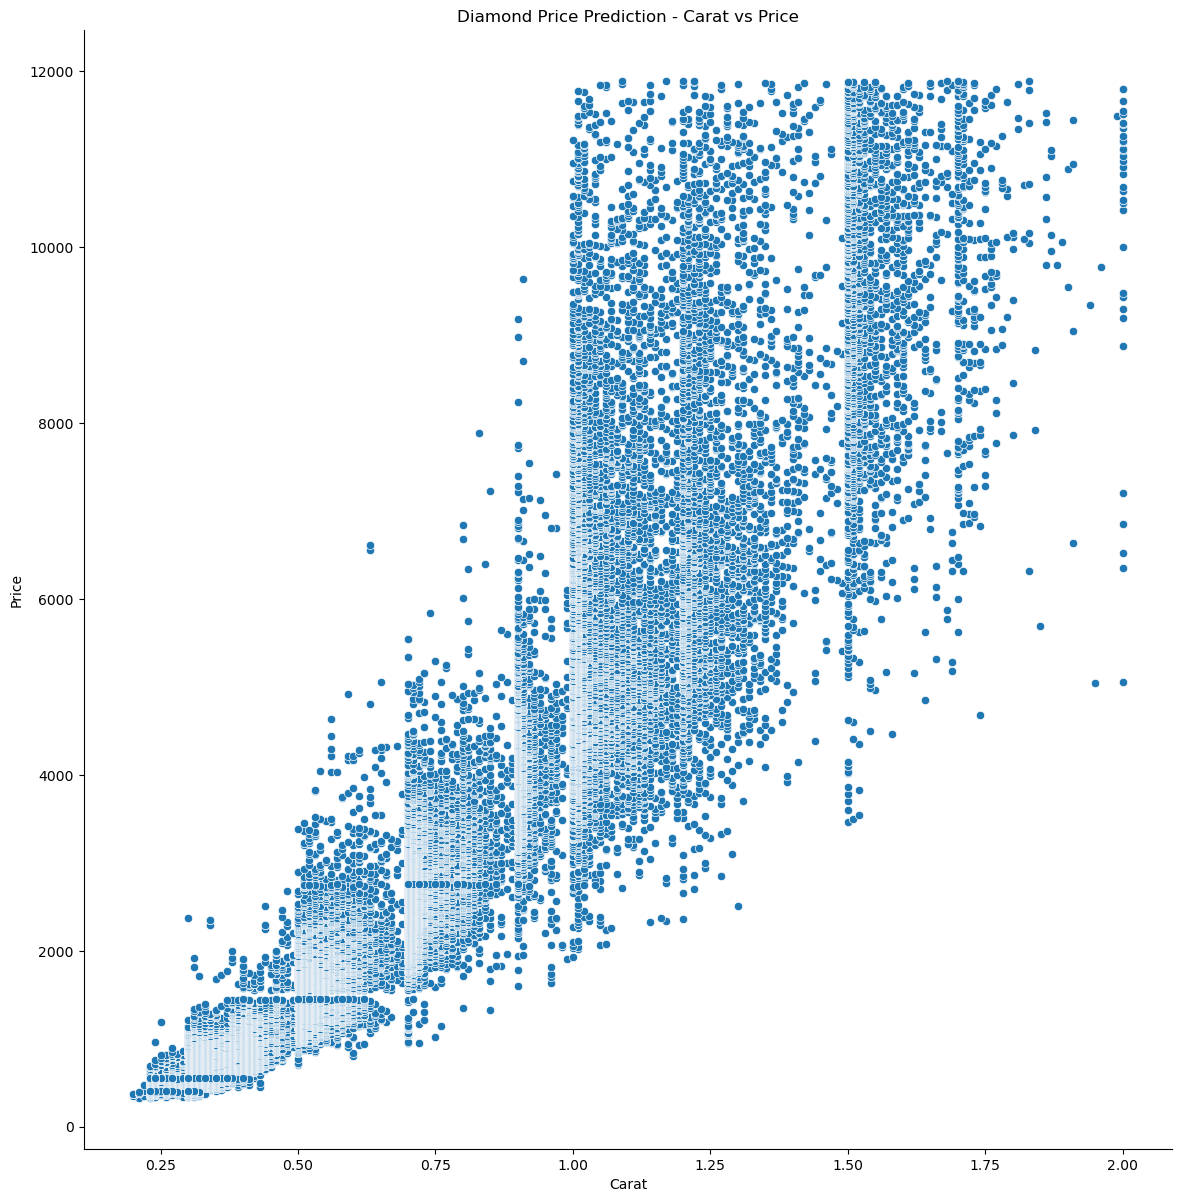

In [65]:
# scatter plot of Carat vs. price
sns.pairplot(data,x_vars=['carat'],y_vars=['price'],height=12,kind='scatter')

plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Diamond Price Prediction - Carat vs Price')

plt.show()

Observations: From the above graph we can see the clear relationship between Carat and Price.

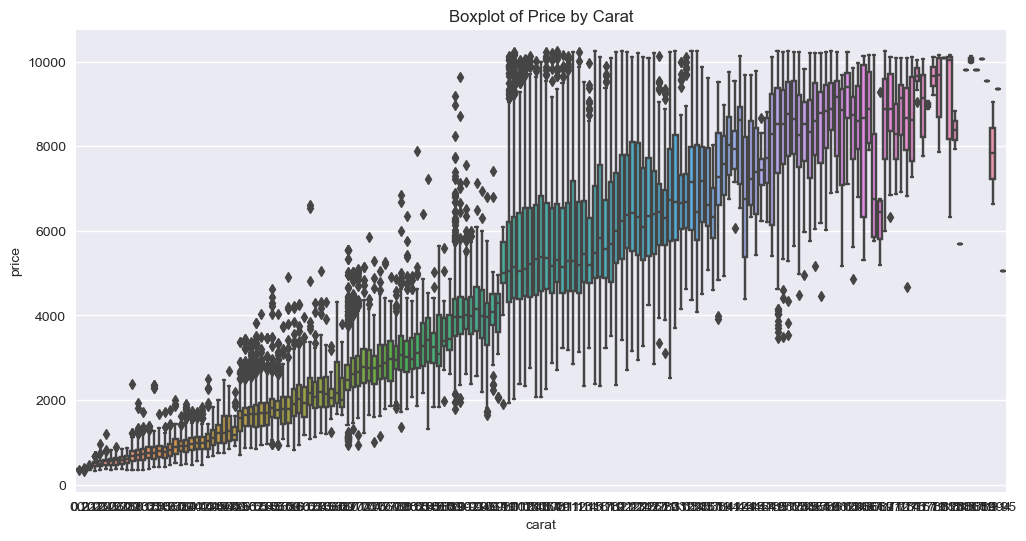

In [67]:
# box plot of price vs carat
plt.figure(figsize=(12, 6))

sns.boxplot(x="carat", y="price", data=data)
plt.title("Boxplot of Price by Carat")

plt.show()

Observation: The boxplot of price by carat in the Diamond Prices dataset shows that carat weight is a strong predictor of diamond price.

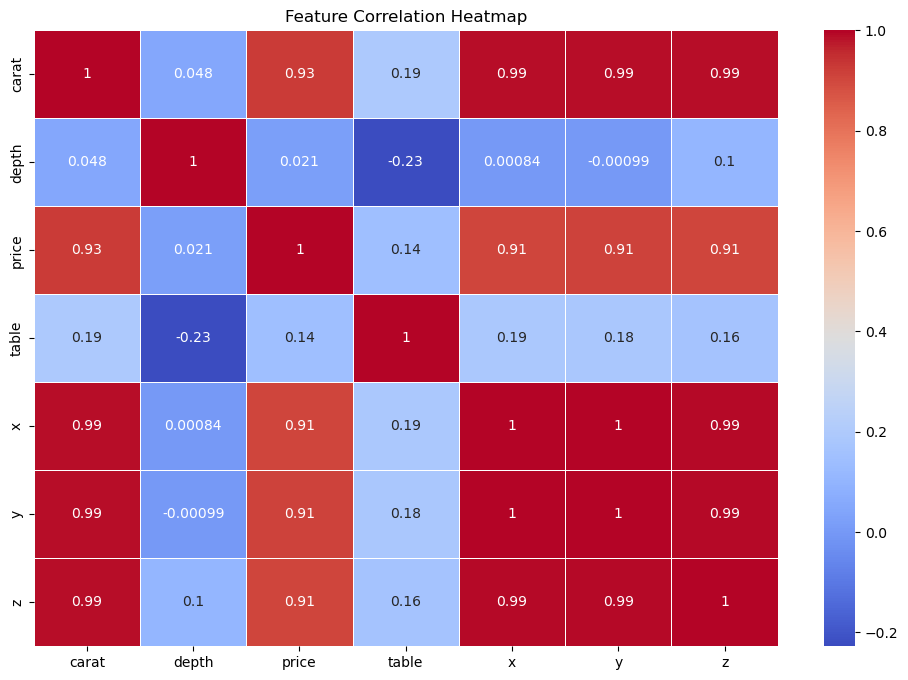

In [17]:
# Let's see the correlation between different variables.
plt.figure(figsize=(12, 8))

sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")

plt.show()

As expected we have can clearly see the high correlation between price and carat

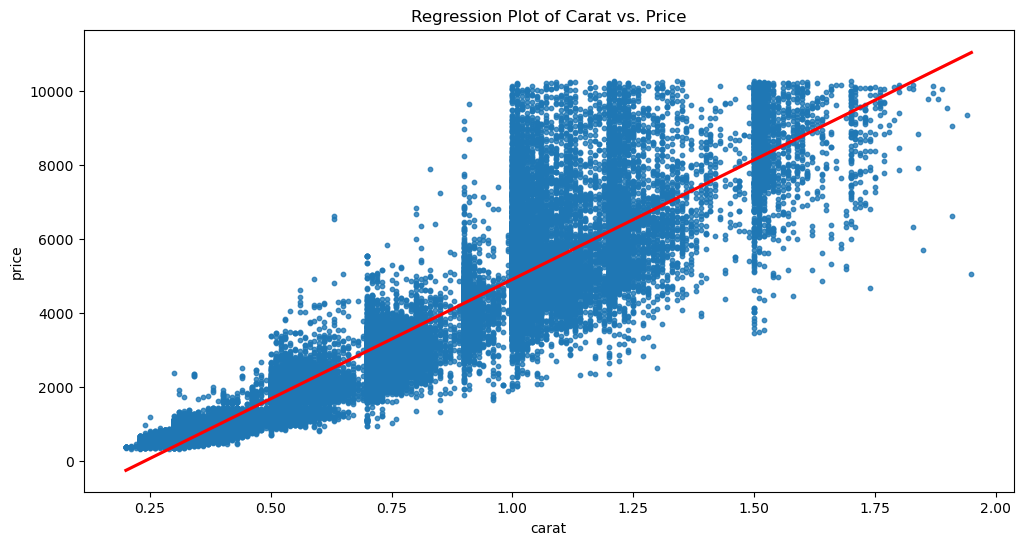

In [18]:
# Regression plot of carat vs. price
plt.figure(figsize=(12, 6))

sns.regplot(x="carat", y="price", data=data, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title("Regression Plot of Carat vs. Price")

plt.show()

Observation: The regression plot of carat vs. price in the Diamond Prices dataset shows a strong positive relationship between the two variables.

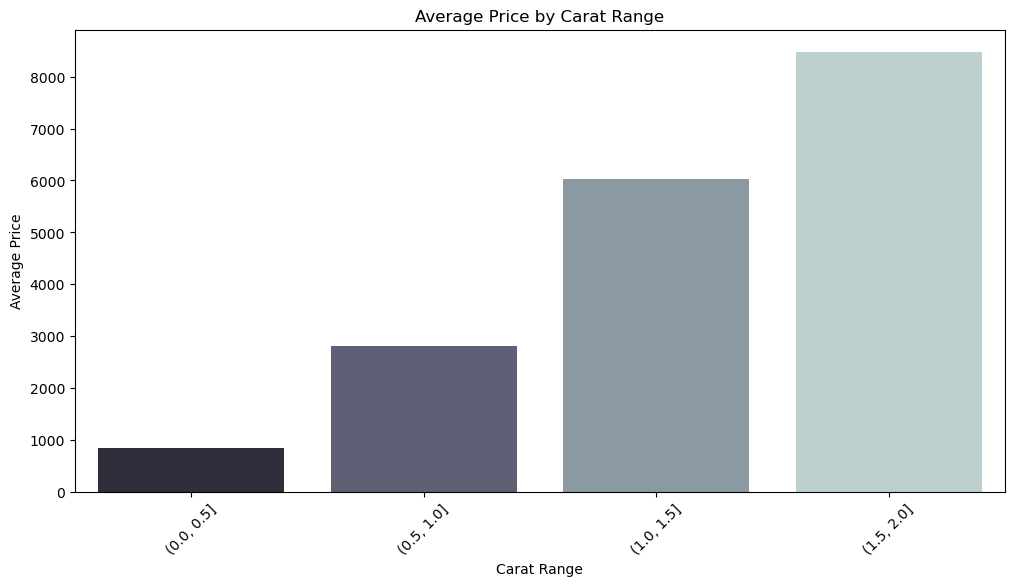

In [22]:
# Bar plot of average price by carat range
carat_ranges = pd.cut(data['carat'], bins=[0, 0.5, 1, 1.5, 2])
average_price_by_carat = data.groupby(carat_ranges)['price'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=average_price_by_carat.index, y=average_price_by_carat.values, palette='bone')

plt.xlabel("Carat Range")
plt.ylabel("Average Price")
plt.title("Average Price by Carat Range")

plt.xticks(rotation=45)

plt.show()

Observation: the bar plot of average price by carat range in the Diamond Prices dataset shows that carat weight is a strong predictor of diamond price.

## Train the Regression Model

Simple linear regression is a statistical method for modeling the relationship between two variables. It is the simplest form of linear regression, and it is used to model the relationship between a single independent variable (x) and a single dependent variable (y).

The mathematical formula for simple linear regression is as follows:

y = a + bx + ε where:

* y is the dependent variable
* x is the independent variable
* a is the intercept
* b is the slope
* ε is the error term

The intercept (a) represents the value of y when x is zero. The slope (b) represents the change in y for every unit change in x. The error term (ε) represents the unexplained variation in y that is not captured by the model.

We are going to use Carat as input (independent variable) and price as output(dependent) variable.



### Building a Simple Linear Regression Model

In [34]:
#Training and Testing Data Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

Utilized the train_test_split function from the sklearn.model_selection library. Typically, it's recommended to allocate 70% of the data to the training dataset and reserve the remaining 30% for the testing dataset as a common practice

In [35]:
from sklearn.preprocessing import StandardScaler

X_train_array = np.array(X_train)
X_train = X_train_array[:,np.newaxis]

X_test_array = np.array(X_test)
X_test = X_test_array[:,np.newaxis]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Create a linear regression model
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled,y_train)

LinearRegression()

In [38]:
# Make predictions on the test data
y_pred = linear_regression_model.predict(X_test_scaled)

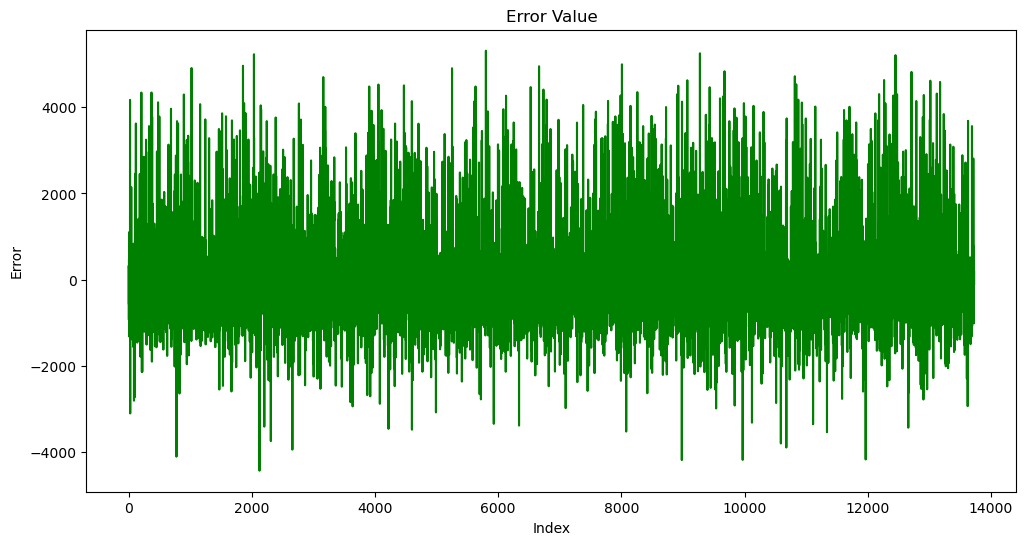

In [40]:
plt.figure(figsize=(12, 6))
idx = [i for i in range(1,len(y_test)+1,1)]

plt.plot(idx,y_test-y_pred,color='green',linestyle='-')

plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error Value')

plt.show()

Observation: The plot of error values vs. index in the Diamond Prices dataset suggests that there may be some systematic errors in the model. These errors can be addressed by retraining the model on a larger and more representative dataset, training the model for more iterations, and using regularization techniques.

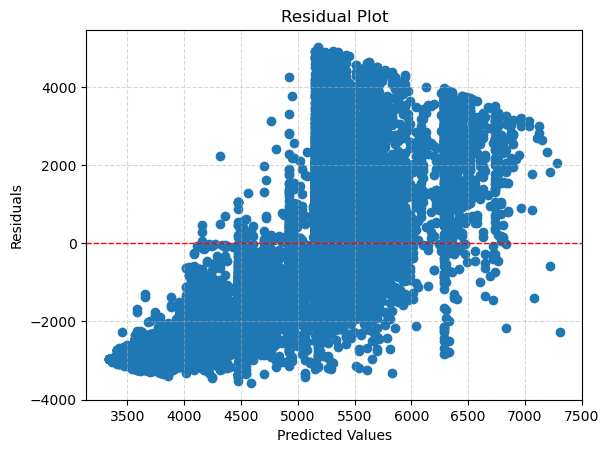

In [43]:
# Create a scatter plot of residuals vs. predicted values
import matplotlib.pyplot as plt

X_train_predict = linear_regression_model.predict(X_train)
residuals = y_train - X_train_predict
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.scatter(X_train_predict, residuals)

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [44]:
import statsmodels.api as sm

# Add a constant (intercept) to the predictor variable
X_train = sm.add_constant(X_train)

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train).fit()



# Get the summary of the regression
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 1.975e+05
Date:                Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:58:19   Log-Likelihood:            -2.6382e+05
No. Observations:               32030   AIC:                         5.276e+05
Df Residuals:                   32028   BIC:                         5.277e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1540.7601     11.187   -137.724      0.0

From the above regression summary, here are some key statistics to focus on:
1. Coefficients and Significance (P-values):
    * The intercept (constant) coefficient (const) is approximately -1540.76.
    * The coefficient for the predictor variable (x1) is approximately 6446.24.
    * The p-values for both coefficients are very close to 0 (0.000), indicating that they are statistically significant.
    

2. R-squared (R²):
    * R-squared (R²) is a measure of how well the independent variable(s) explain the variance in the dependent variable.
    * In this case, R-squared (R²) is approximately 0.860, which means that about 86% of the variance in 'price' can be explained by the predictor variable.


3. F Statistic and its Significance:
    * The F-statistic tests the overall significance of the model.
    * F-statistic: 1.975e+05
    * Prob (F-statistic): 0.00 (very close to 0)
    * The low p-value (close to 0) for the F-statistic indicates that the overall model is statistically significant, meaning that at least one independent variable is related to the dependent variable.

In summary, the provided linear regression model is highly statistically significant. Both the intercept and the coefficient for the predictor variable (carat) are highly significant in predicting the diamond prices. The R-squared value of 0.860 suggests that the model explains a substantial portion of the variance in prices, and the extremely low p-value for the F-statistic supports the overall significance of the model. This indicates a strong linear relationship between carat and diamond prices. The regression equation can be expressed as:

#### Price = -1540.76 + 6446.24 × Carat

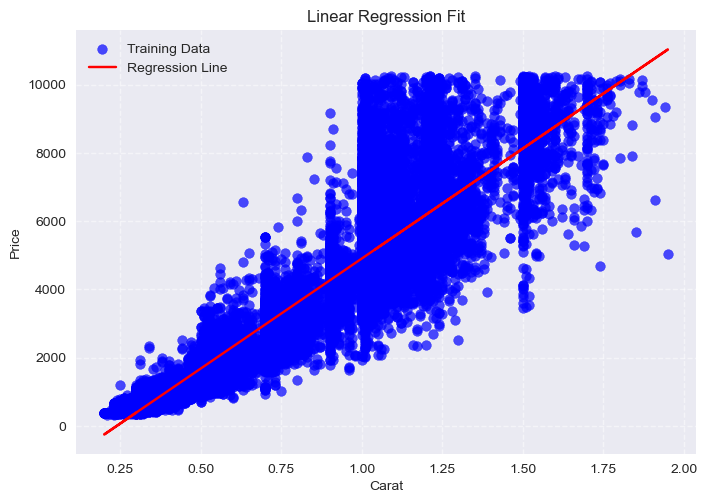

In [54]:
# Create a scatter plot for the training data
plt.scatter(X_train[:, 1], y_train, label='Training Data', color='blue', marker='o', alpha=0.7)

# Calculate the predictions using the equation
y_pred_train = -1540.76 + 6446.24 * X_train[:, 1]

# Plot the regression line
plt.plot(X_train[:, 1], y_pred_train, 'r', label='Regression Line')

# Add labels and title
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Linear Regression Fit')

# Display the legend
plt.legend()

# Show grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Model Evaluation

In [45]:
from sklearn.metrics import r2_score,mean_squared_error

print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))
print("R2 Score: ", r2_score(y_test,y_pred))

print('Intercept of the model:', linear_regression_model.intercept_)
print('Coefficient of the line:', linear_regression_model.coef_)

Mean Squared Error:  834876.1857704605
R2 Score:  0.8616973298852353
Intercept of the model: 2883.3724320949104
Coefficient of the line: [2269.33561529]


### Residual Analysis

Examine the distribution of the residuals (differences between actual and predicted values). A random and normally distributed set of residuals is a good sign.



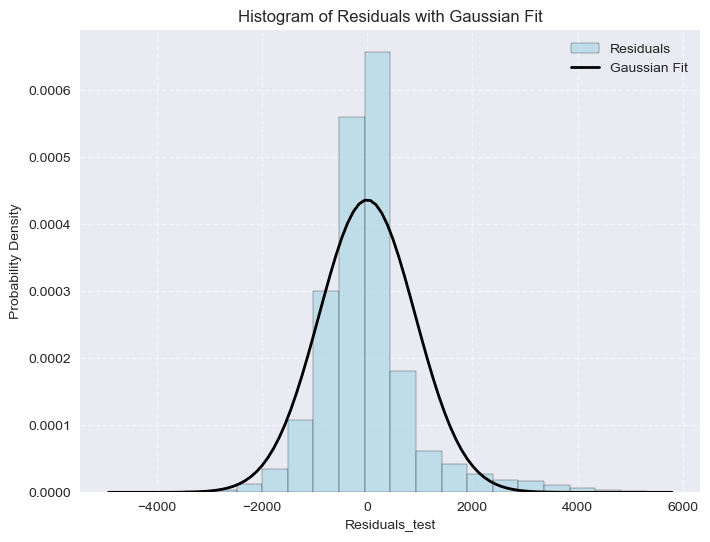

In [58]:
from scipy.stats import norm


# Calculate the residuals
residuals_test = y_test - y_pred

# Create a histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals_test, bins=20, density=True, edgecolor='k', alpha=0.7, color='lightblue', label='Residuals')

# Fit a Gaussian distribution (PDF) to the residuals
mu, std = norm.fit(residuals_test)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Overlay the fitted curve on the histogram
plt.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

plt.xlabel('Residuals_test')
plt.ylabel('Probability Density')
plt.title('Histogram of Residuals with Gaussian Fit')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

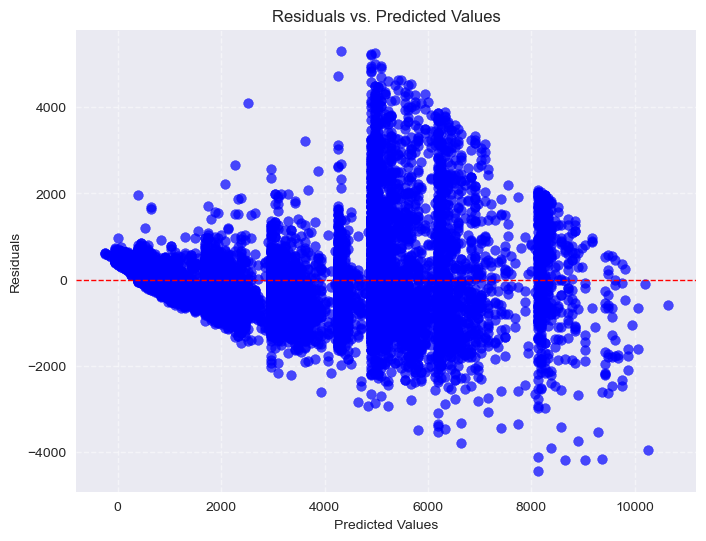

In [62]:
# Create a scatter plot of residuals vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals_test, color='blue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [63]:
# Save the trained model using pickle
import pickle

with open("linear_regression_model.pkl", "wb") as model_file:
    try:
        pickle.dump(linear_regression_model, model_file)
        print("Model saved succesfully.")

    except Exception as error_msg:
        print("ERROR: Model saving failed.\n", error_msg)

Model saved succesfully.


### Model Inferencing 

In [65]:
try:
    with open("linear_regression_model.pkl", "rb") as model_file:
        model = pickle.load(model_file)
        print("Model loaded succesfully.")

except Exception as error_msg:
    print("ERROR: Saved model loading failed.")
    use_trained_model = str(input("Do you want to use the trained model instead? (Y/N): "))

    if use_trained_model == 'Y' or 'y':
        model = linear_regression_model
        print("Trained model loaded succesfully.")

    else:
        print(error_msg)

Model loaded succesfully.


In [66]:
input_carat = float(input("Enter the carats: "))

if model:
    predicted_price = model.predict([[input_carat]])[0]
    print(f"Predicted Price for a {input_carat} carat diamond is ${predicted_price:.2f}")

else:
    print("Model not found. Try loading the saved model again or infer from the trained model.")

Enter the carats: 2.3
Predicted Price for a 2.3 carat diamond is $8102.84
